# V13코드를 기반으로 lightGBM 을 사용한 버전
# V17코드를 기반으로 lightGBM 을 사용한 다른 버전

# 시각화

In [44]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set() # setting seaborn default for plots

def bar_chart(feature):
    yes = train[train['voted']==1][feature].value_counts()
    no = train[train['voted']==2][feature].value_counts()
    df = pd.DataFrame([yes,no])
    df.index = ['Yes','No']
    df.plot(kind='bar',stacked=True, figsize=(10,5))

In [45]:
import pandas as pd

train=pd.read_csv('./train.csv')
test=pd.read_csv('./test_x.csv')

# 데이터 전처리

In [46]:
import numpy as np
family_drop_score=10

train['familysize']=np.where(train['familysize'] >= family_drop_score, family_drop_score, train['familysize'])
test['familysize']=np.where(test['familysize'] >= family_drop_score, family_drop_score, test['familysize'])

train['education']=np.where(train['education'] == 0, 2, train['education'])
test['education']=np.where(test['education'] == 0, 2, test['education'])

train['urban']=train['urban'].astype('str')
test['urban']=test['urban'].astype('str')

train['education']=train['education'].astype('str')
test['education']=test['education'].astype('str')


# 원핫 인코딩 (gender, race, religion)

In [47]:
train=pd.get_dummies(train, columns=['race'])
train=pd.get_dummies(train, columns=['religion'])
train=pd.get_dummies(train, columns=['urban'])
train=pd.get_dummies(train, columns=['hand'])
train=pd.get_dummies(train, columns=['gender'])

test=pd.get_dummies(test, columns=['race'])
test=pd.get_dummies(test, columns=['religion'])
test=pd.get_dummies(test, columns=['urban'])
test=pd.get_dummies(test, columns=['hand'])
test=pd.get_dummies(test, columns=['gender'])

In [48]:
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()
train['age_group_code'] = label.fit_transform(train['age_group'])
train['education_code'] = label.fit_transform(train['education'])

test['age_group_code'] = label.fit_transform(test['age_group'])
test['education_code'] = label.fit_transform(test['education'])

# Feature : Mach_score (마키아벨리니즘 스코어)

In [49]:
Answers = ['QaA', 'QbA', 'QcA', 'QdA', 'QeA',
             'QfA', 'QgA', 'QhA', 'QiA', 'QjA', 
             'QkA', 'QlA', 'QmA', 'QnA', 'QoA', 
             'QpA', 'QqA', 'QrA', 'QsA', 'QtA']

In [50]:
reverse = ["QeA", "QfA", "QkA", "QqA", "QrA"]
for r in reverse: 
        train[r] = 6 - train[r]
        test[r] = 6 - test[r]

In [51]:
reverse = ["QaA", "QdA", "QgA", "QiA", "QnA"]
for r in reverse: 
        train[r] = 6 - train[r]
        test[r] = 6 - test[r]

In [52]:
train['Mach_score'] = train[Answers].mean(axis = 1)
test['Mach_score'] = test[Answers].mean(axis = 1)

# TIPI
## 성실성 (Conscientiousness)
## 우호성 (Agreeableness)
## 신경성 (Neuroticism) - 정서적 안정감
## 개방성 (Openness to experience)
## 외향성 (Extroversion)

- 성실성 : {3번 점수 + (8 - '8번 점수')} ÷ 2
- 우호성 : {7번 점수 + (8 - '2번 점수')} ÷ 2
- 정서적 안정성(점수가 낮으면 신경성과 관련) : {9번 점수 + (8 - '4번 점수')} ÷ 2
- 개방성 : {5번 점수 + (8 - '10번 점수')} ÷ 2
- 외향성 : {1번 점수 + (8 - '6번 점수')} ÷ 2

In [53]:
train['TIPT_C']=(train['tp03']+(8-train['tp08']))/2
train['TIPT_A']=(train['tp07']+(8-train['tp02']))/2
train['TIPT_N']=(train['tp09']+(8-train['tp04']))/2
train['TIPT_O']=(train['tp05']+(8-train['tp10']))/2
train['TIPT_E']=(train['tp01']+(8-train['tp06']))/2

test['TIPT_C']=(test['tp03']+(8-test['tp08']))/2
test['TIPT_A']=(test['tp07']+(8-test['tp02']))/2
test['TIPT_N']=(test['tp09']+(8-test['tp04']))/2
test['TIPT_O']=(test['tp05']+(8-test['tp10']))/2
test['TIPT_E']=(test['tp01']+(8-test['tp06']))/2

# wf_(1~3) : 설문자의 어휘 능력 (허구인 단어의 정의를 앎)

In [54]:
wf=['wf_01', 'wf_02', 'wf_03']

train['wf']=train[wf].mean(axis=1)
test['wf']=test[wf].mean(axis=1)

# drop 할 feature들

In [55]:
drop_feature=[
#                 'engnat',
    
#                 'familysize',
    
#                 'married',
    
#                 'race_Arab', 'race_Asian','race_Black','race_Indigenous Australian','race_Native American','race_Other','race_White',               
    
#                 'religion_Agnostic','religion_Atheist', 'religion_Buddhist','religion_Christian_Catholic','religion_Christian_Mormon', 
#                 'religion_Christian_Other', 'religion_Christian_Protestant', 'religion_Hindu','religion_Jewish','religion_Muslim', 
#                 'religion_Other','religion_Sikh',
    
#                 'gender_Female','gender_Male',
                
#                 'urban_0','urban_1','urban_2','urban_3',
    
                'education',
                
                'age_group',
                
                'QaA', 'QbA', 'QcA', 'QdA', 'QeA','QfA', 'QgA', 'QhA', 'QiA', 'QjA', 'QkA', 'QlA', 'QmA', 'QnA', 'QoA','QpA', 
                'QqA', 'QrA', 'QsA', 'QtA',
                
                'QaE', 'QbE', 'QcE', 'QdE', 'QeE', 'QfE', 'QgE', 'QhE', 'QiE', 'QjE', 'QkE', 'QlE','QmE', 'QnE', 'QoE', 'QpE', 
                'QqE', 'QrE', 'QsE', 'QtE',
    
#                 'p_time' , 

#                 'n_time',
              
                'tp01', 'tp02', 'tp03', 'tp04', 'tp05','tp06','tp07', 'tp08', 'tp09', 'tp10',
              
#                 'wr_01', 'wr_02', 'wr_03', 'wr_04', 'wr_05', 'wr_06', 'wr_07', 'wr_08', 'wr_09','wr_10','wr_11', 'wr_12', 'wr_13', 
                'wr_02',  'wr_04', 'wr_07', 'wr_08', 'wr_10', 'wr_12', 'wr_13', 
                'wf_01', 'wf_02', 'wf_03', 'wf',
              
                'hand_0','hand_1','hand_2','hand_3',
              
              ]

train = train.drop(drop_feature, axis = 1)
test = test.drop(drop_feature, axis = 1)

# Model 생성

In [56]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
import lightgbm as lgb

# 사용한 feature 목록

In [57]:
for i in train:
    print(i)


index
engnat
familysize
married
voted
wr_01
wr_03
wr_05
wr_06
wr_09
wr_11
race_Arab
race_Asian
race_Black
race_Indigenous Australian
race_Native American
race_Other
race_White
religion_Agnostic
religion_Atheist
religion_Buddhist
religion_Christian_Catholic
religion_Christian_Mormon
religion_Christian_Other
religion_Christian_Protestant
religion_Hindu
religion_Jewish
religion_Muslim
religion_Other
religion_Sikh
urban_0
urban_1
urban_2
urban_3
gender_Female
gender_Male
age_group_code
education_code
Mach_score
TIPT_C
TIPT_A
TIPT_N
TIPT_O
TIPT_E


# 모델 전처리

In [58]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import *
from lightgbm import LGBMClassifier

import warnings
import gc
warnings.filterwarnings("ignore")

X = train.copy()
X.drop('voted', axis=1, inplace = True)
Y = train['voted']

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=0)

In [59]:
import lightgbm as lgb

model=lgb.LGBMClassifier()
model.fit(x_train,y_train)


LGBMClassifier()

accuracy_score (정확도): 0.6976573938506588
precision_score (정밀도) : 0.7558247903075489
recall_score (재현율): 0.6554418103448276
sensitivity_score (민감도(거짓탐색)): 0.6554418103448276
specificity_score (특이도(참탐색)): 0.7479153303399615
auc score : 0.29832142965760544
F1 score : 0.6931193342249963


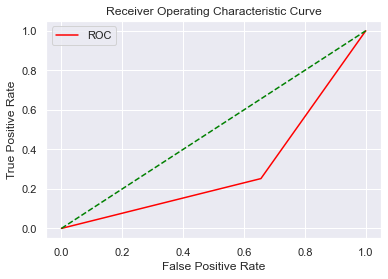

In [60]:
y_pred=model.predict(x_test)

from sklearn.metrics import *

def plot_roc_curve(fpr, tpr):
    plt.plot(fpr, tpr, color='red', label='ROC')
    plt.plot([0, 1], [0, 1], color='green', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic Curve')
    plt.legend()
    plt.show()

TN, FP, FN, TP = confusion_matrix(y_test, y_pred).ravel()
print('accuracy_score (정확도):',accuracy_score(y_test, y_pred))
print('precision_score (정밀도) :',TP/(TP+FP))
print('recall_score (재현율):',TP/(TP+FN))
print('sensitivity_score (민감도(거짓탐색)):',TP/(TP+FN))
print('specificity_score (특이도(참탐색)):',TN/(FP+TN))
FPR, TPR, thresholds = roc_curve(y_test, y_pred, pos_label=1)
print('auc score :',auc(FPR, TPR))
print('F1 score :',f1_score(y_test, y_pred))
plot_roc_curve(FPR, TPR)

In [61]:
print("train set score:{:.4f}".format(model.score(x_train, y_train)))

print("test set score:{:.4f}".format(model.score(x_test, y_test)))

train set score:0.7358
test set score:0.6977


In [63]:
import lightgbm as lgb

train_ds = lgb.Dataset(x_train, label = y_train)
test_ds = lgb.Dataset(x_test, label = y_test)
params = {'learning_rate': 0.01,
          'max_depth': 16,
          'boosting': 'gbdt',
          'objective': 'binary',
          'metric': 'mse',
          'is_training_metric': True,
          'num_leaves': 144,
          'feature_fraction': 0.9,
          'bagging_fraction': 0.7,
          'bagging_freq': 5,
          'seed':2020}

model = lgb.train(params, train_ds, 1000, test_ds, verbose_eval=100, early_stopping_rounds=100)
y_pred=model.predict(x_test)
pred_proba = model.predict_proba(test)[:,1]

# lgbm_wrapper = LGBMClassifier(n_estimators=400)
# evals = [(x_val, y_val)]
# lgbm_wrapper.fit(x_train, y_train, early_stopping_rounds=100, eval_metric='AUC', eval_set=evals, verbose=True)
# pred = lgbm_wrapper.predict(x_val)
# pred_proba = lgbm_wrapper.predict_proba(x_val)[:1]

submission= pd.read_csv('./sample_submission.csv')
submission['voted'] = pred_proba
submission.to_csv('submission_proba.csv', index = False)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Contains only one class
[LightGBM] [Info] Number of positive: 31872, number of negative: 0
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001665 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 506
[LightGBM] [Info] Number of data points in the train set: 31872, number of used features: 43
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] [binary:BoostFromScore]: pavg=1.000000 -> initscore=34.539576
[LightGBM] [Info] Start training from score 34.539576
[LightGBM] [Info] [binary:BoostFromScore]: pavg=1.000000 -> initscore=34.539576
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
Training until validation scores don't improve for 100 

AttributeError: 'Booster' object has no attribute 'predict_proba'

In [ ]:
submission= pd.read_csv('./sample_submission.csv')
submission['voted'] = y_pred
submission.to_csv('submission_proba.csv', index = False)